## Bank Note Authentication Analysis

Whenever we go to the bank to deposit some cash money, the cashier places banknotes in a machine which tells whether a banknote is real or not. This is a classification problem where we are given some input data and we have to classify the input into one of the several predefined categories. Rule-based as well as statistical techniques are commonly used for solving classification problems. Machine learning algorithms fall in the category of statistical techniques.

In this article, we explain the process of building a banknote authentication system using machine learning algorithms. After reading this article, you will be able to understand how classification systems are built using machine learning algorithms.

### Importing pyforest library

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
from pyforest import *

In [60]:
#lazy_imports()

### Loding BankNote_Authentication(UCI) dataset from kaggle

In [4]:
df = pd.read_csv("BankNote_Authentication.csv")
df.head()

<IPython.core.display.Javascript object>

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
df.shape

(1372, 5)

In [6]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

#### There is no need of EDA process because data is already balanced and no missing value

In [7]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


### Visualization

<IPython.core.display.Javascript object>

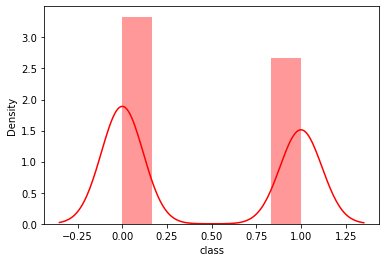

In [9]:
sns.distplot(df['class'],color='red',kde=True);

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


<IPython.core.display.Javascript object>

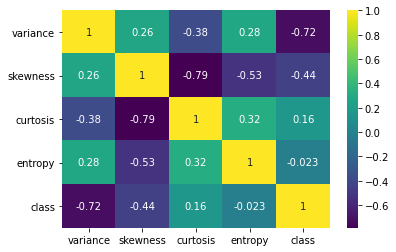

In [11]:
sns.heatmap(df.corr(),annot=True,cmap='viridis')

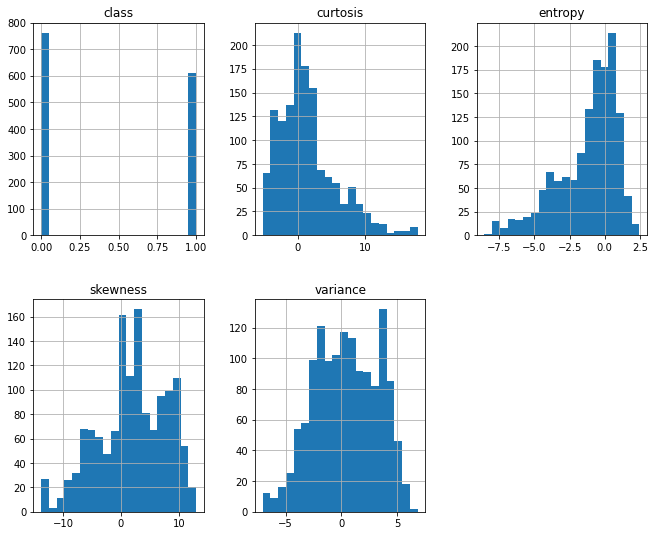

In [12]:
df.hist(bins=20,figsize=(11,9),layout=(2,3));

<IPython.core.display.Javascript object>

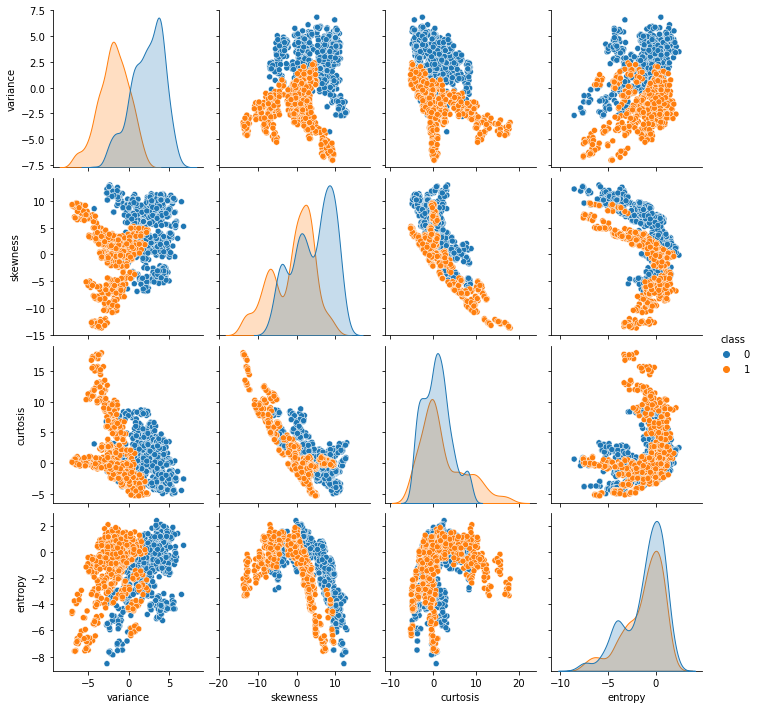

In [13]:
sns.pairplot(df,hue='class');

### Data to Build model

In [14]:
X = df.drop('class',axis=1)
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [15]:
y = df['class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

### Splitting Data into train & test

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)

<IPython.core.display.Javascript object>

In [17]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (1097, 4)
y_train: (1097,)
X_test: (275, 4)
y_test: (275,)


### Data Preprocessing

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

X=scaler.fit_transform(X)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print("X_train:\n", X_train)
print("\n")
print("X_test:\n", X_test)

X_train:
 [[-1.58438248  0.1072115  -0.14276339  0.03334576]
 [-1.08829139 -2.53123321  2.67783284 -0.35092979]
 [ 1.13672843 -0.15348755 -0.16820608  0.86368769]
 ...
 [-1.6900361   0.72314447 -0.19588896 -2.05114485]
 [ 0.57766241  0.02698182  0.1851622   0.52080477]
 [-0.9644631   0.30908695 -0.49734797 -0.03521515]]


X_test:
 [[-1.40564511 -0.03629527 -0.25946279 -0.55356298]
 [ 0.27456924  0.39719812  0.19050204  0.69982149]
 [-1.56677623 -1.70567084  2.36049857 -0.08188265]
 ...
 [ 0.33303672  0.90277959 -0.894603    0.10774845]
 [ 0.24291663 -0.00314587 -0.98169159  0.65423293]
 [ 0.44734548  0.89770987 -0.5083209  -0.56573811]]


### 1) Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [21]:
classifire = LogisticRegression(solver='liblinear',random_state=1)

classifire.fit(X_train, y_train)
accuracies = cross_val_score(estimator = classifire,X=X_train,y=y_train,cv=10)

print("Accuracies:\n ",accuracies)

Accuracies:
  [0.98181818 0.99090909 0.98181818 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]


In [22]:
print("Mean Accuracies: ",accuracies.mean())

Mean Accuracies:  0.9835863219349459


In [23]:
classifire_pred = classifire.predict(X_test)
classifire_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [24]:
from sklearn import metrics

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

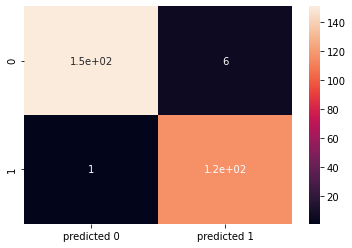

In [25]:
cm = metrics.confusion_matrix(y_test,classifire_pred,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ['predicted 0','predicted 1']])

sns.heatmap(df_cm,annot=True)

### 2) Support Vector Machine

In [26]:
from sklearn.svm import SVC

In [27]:
svm_classifire = SVC(kernel="linear")

svm_classifire.fit(X_train,y_train)

svm_accuracies = cross_val_score(estimator=svm_classifire,X=X_train,y=y_train,cv=10)

print("Accuracies:\n ",svm_accuracies)

Accuracies:
  [0.99090909 0.99090909 0.99090909 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]


In [28]:
print("Mean Accuracy:",svm_accuracies.mean())

Mean Accuracy: 0.9854045037531277


In [29]:
svm_classifire_pred = svm_classifire.predict(X_test)
svm_classifire_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

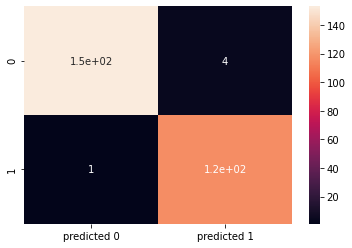

In [30]:
cm = metrics.confusion_matrix(y_test,svm_classifire_pred,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ['predicted 0','predicted 1']])

sns.heatmap(df_cm,annot=True)

### 3) Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rfc_classifier = RandomForestClassifier(n_estimators=50, criterion='entropy',random_state=1)
rfc_classifier.fit(X_train, y_train)

rfc_accuracies = cross_val_score(estimator=rfc_classifier,X=X_train,y=y_train,cv=10)

print("Accuracies:\n ",rfc_accuracies)

Accuracies:
  [0.98181818 0.99090909 0.99090909 0.98181818 0.99090909 0.99090909
 1.         1.         1.         1.        ]


In [33]:
print("Mean Accuracy:",rfc_accuracies.mean())

Mean Accuracy: 0.9927272727272728


In [34]:
rfc_classifier_pred = rfc_classifier.predict(X_test)
rfc_classifier_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

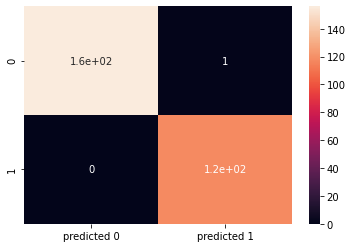

In [35]:
cm = metrics.confusion_matrix(y_test,rfc_classifier_pred,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ['predicted 0','predicted 1']])

sns.heatmap(df_cm,annot=True)

### 4) KNN Classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV

param_grid = {'leaf_size': [2,5,7,9,11],'n_neighbors':[2,5,7,9,11],'p':[1,2]}

grid = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid)

grid.fit(X_train, y_train)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]})

In [37]:
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}

In [38]:
KNN = KNeighborsClassifier(n_neighbors=2 ,p=1 ,leaf_size=2 )

In [39]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=2, n_neighbors=2, p=1)

In [40]:
KNN_pred = KNN.predict(X_test)

In [41]:
knn_accuracies = cross_val_score(estimator=KNN,X=X_train,y=y_train,cv=10)

print("Accuracies:\n ",knn_accuracies)

Accuracies:
  [0.99090909 0.99090909 0.99090909 1.         1.         1.
 1.         1.         1.         1.        ]


In [42]:
print("Mean Accuracy:",knn_accuracies.mean())

Mean Accuracy: 0.9972727272727273


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

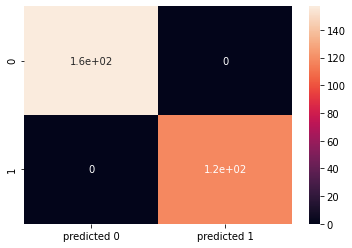

In [43]:
cm = metrics.confusion_matrix(y_test,KNN_pred,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ['predicted 0','predicted 1']])

sns.heatmap(df_cm,annot=True)

### 5) Multilayer Preception (Neural Network)

In [44]:
from sklearn.neural_network import MLPClassifier 

In [45]:
multi_class = MLPClassifier(hidden_layer_sizes=(8,4),max_iter=8000, alpha=0.0001, solver='sgd',verbose=10,random_state= 21,tol=0.000000001)

In [1]:
# Uncomment before run

# multi_class.fit(X_train, y_train)

In [47]:
multi_class_predict=multi_class.predict(X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

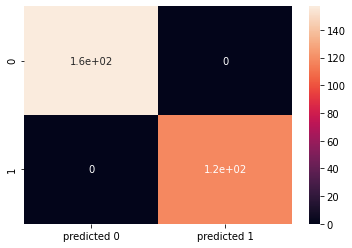

In [48]:
cm = metrics.confusion_matrix(y_test,multi_class_predict,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ['predicted 0','predicted 1']])

sns.heatmap(df_cm,annot=True)

### Comparing All the Algorithms

In [61]:
print("LogisticRegression: {0:.4f}%".format(accuracies.mean()*100))
print("\n")
print("Support Vector Machine: {0:.4f}%".format(svm_accuracies.mean()*100))
print("\n")
print("Random Forest: {0:.4f}%".format(rfc_accuracies.mean()*100))
print("\n")
print("KNN: {0:.4f}%".format(knn_accuracies.mean()*100))
print("\n")
print("Nueral Network: {}%".format(100))
print("\n")

LogisticRegression: 98.3586%


Support Vector Machine: 98.5405%


Random Forest: 99.2727%


KNN: 99.7273%


Nueral Network: 100%


